In [1]:
import json
import pandas as pd
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
! pip install -U gensim

In [4]:
! pip install -U spacy==2.2.3

In [5]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0 MB 4.3 MB/s eta 0:00:01�██▌| 11.8 MB 4.3 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [6]:
import spacy
from spacy.language import Language
from spacy.lang.es.stop_words import STOP_WORDS

In [7]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [8]:
from tqdm import tqdm_notebook as tqdm

In [9]:
KickStarterDataSet=pd.read_json('https://raw.githubusercontent.com/thousandoaks/topicmodelling/master/BEMM216Assignment.json')

In [10]:
KickStarterDataSet.sample()

,about_description,currency_simbol,img_text_general,investors_all,location,no_created,opt_min,project_by,project_title,reached,...,region,currency,total_investors,goal,total_pledged,backers_new,backers_returning,backers_total,canceledTimeStamp,Language
56622,Creating Spicy Salsa from organic vegetables g...,[CA$],https://ksr-ugc.imgix.net/assets/012/340/490/0...,[1],"Mississauga, Canada",First created,"[2,000]",Gabi Starosta,Captain Jamie's Hot Salsa,[5.00],...,Canada,CA$,1,2000,5.0,NaN,NaN,NaN,NaT,en


In [11]:
KickStarterDataSet.columns

Index(['about_description', 'currency_simbol', 'img_text_general',
       'investors_all', 'location', 'no_created', 'opt_min', 'project_by',
       'project_title', 'reached', 'status', 'tag', 'text_general',
       'text_risks', 'new_backers', 'returning_backers', 'supporting',
       'Unsuccessful', 'canceled', 'end_date', 'failure', 'start_date', 'city',
       'region', 'currency', 'total_investors', 'goal', 'total_pledged',
       'backers_new', 'backers_returning', 'backers_total',
       'canceledTimeStamp', 'Language'],
      dtype='object')

In [12]:
KickStarterDataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5010 entries, 0 to 95694
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   about_description  5010 non-null   object 
 1   currency_simbol    5010 non-null   object 
 2   img_text_general   5010 non-null   object 
 3   investors_all      5010 non-null   object 
 4   location           5010 non-null   object 
 5   no_created         5010 non-null   object 
 6   opt_min            5010 non-null   object 
 7   project_by         5010 non-null   object 
 8   project_title      5010 non-null   object 
 9   reached            5010 non-null   object 
 10  status             5010 non-null   object 
 11  tag                5010 non-null   object 
 12  text_general       5010 non-null   object 
 13  text_risks         5010 non-null   object 
 14  new_backers        2751 non-null   object 
 15  returning_backers  2751 non-null   object 
 16  supporting         2751

In [13]:
pd.options.display.max_colwidth=1500

KickStarterDataSet[['text_risks','text_general']]

,text_risks,text_general
0,"A capital project is fraught with risks and challenges, but we’re confident with this support from Kickstarter we can overcome them. The biggest immediate challenge we face is hitting the minimum income eligibility required to register our charity officially. But once we raise just £2,500 more we can apply to Charities Commission to register officially, which opens a whole world of opportunity up to us! The registration process can take up to 40 days so the sooner we get our application in the better. We’re giving ourselves a big lead time to starting the build, ensuring we can realistically register and secure funding before work commences in January. As part of progressing the design of the theatre, we have to have the ceiling load tested and the room surveyed. This will help us design a theatre that is not only unbelievably sexy, but safe too. The sooner we can get the surveyor in, the more quickly we can deal with any issues, adapt the design where necessary, and finalise the details ready to go to the funders to apply for the £20,000 we need to commence the build. To minimise risk for this project, we’ve allowed the best part of a year to overcome these challenges. Once this foundation stage is completed we will know exactly what we are up against. This will help us overcome future obstacles on the road to building the first pub theatre in Cardiff. The benefits of the seed funding don’t stop at getting the build on the go. Achieving registered charity status as a dir...","“It's rare for a talented and successful director such as Kate to take the bold step of moving from an Associate position in a well-resourced regional theatre into the precarious territory of fringe producing and directing. The fact that this is a challenge that Kate is embracing is a testament both to her own vision and to the current potential of the Cardiff fringe scene.” John McGrath, Artistic Director, National Theatre Wales “Cardiff needs a new producing house of this scale and Kate Wasserberg is exactly the right person to run it. I am very excited by her plans and look forward to them becoming reality.” Tim Price, Playwright. “The Finborough has shown how ‘small theatre’ can create a national impact. That is Kate’s ambition for Cardiff. She has passion, professionalism, talent and an encyclopedic knowledge of Wales and its writers.” Terry Hands, Artistic Director, Clwyd Theatr Cymru\nYou can visit our website here. Or, like us on facebook and follow us on twitter.The Vision We wouldn’t want to be making work anywhere else in the world right now. The Other Room is a direct response to the overwhelming talent to be found in Cardiff and throughout Wales. Teeming with actors, writers, designers and directors of world-class quality, this city is the perfect place to establish a small producing house that makes bold, cutting edge theatre. Our vision is to build a theatre with a reputation comparable to venues such as the Finborough Theatre, King’s Head and The Gate. T..."
1,An initial challenge would be getting the word out to the public that the theatre has adopted to the new digital system. Marketing and advertising the new system would be a challenge. Training the staff on the new equipment and maintaining the equipment in good working condition could also be a potential obstacle.,"The historical Gibson Theatre in Batesville Indiana needs to make the change from 35 mm movies to the new digital format in order to remain open to continue to show movies.Our ultimate goal of the Gibson Theatre is to purchase and install the necessary equipment to covert from 35 mm movies to a digital system. We have applied for local grants and are in the process of doing fund raisers such as the Kickstarter Program and working with organizations in our local community to assist in reaching our goals of raising funds to meet matching grants. We have been working with the Rural Alliance of the Arts, the local community schools and the Chambers

In [14]:
KickStarterDataSetSmall=KickStarterDataSet.sample(500)

In [15]:
KickStarterDataSetSmall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 31915 to 67045
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   about_description  500 non-null    object 
 1   currency_simbol    500 non-null    object 
 2   img_text_general   500 non-null    object 
 3   investors_all      500 non-null    object 
 4   location           500 non-null    object 
 5   no_created         500 non-null    object 
 6   opt_min            500 non-null    object 
 7   project_by         500 non-null    object 
 8   project_title      500 non-null    object 
 9   reached            500 non-null    object 
 10  status             500 non-null    object 
 11  tag                500 non-null    object 
 12  text_general       500 non-null    object 
 13  text_risks         500 non-null    object 
 14  new_backers        289 non-null    object 
 15  returning_backers  289 non-null    object 
 16  supporting         2

# 1. Topic Modelling on Risks and Challenges

In [16]:
pd.options.display.max_colwidth=1500
KickStarterDataSetSmall['text_risks'].head()

31915                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Expect to receive striking, individually-produced pieces of art

In [17]:
KickStarterDataSetSmall[['text_risks']]

,text_risks
31915,"Expect to receive striking, individually-produced pieces of art from a world-renowned Artist, in conjunction with a historic public art project.In relation to the artwork being offered, risks and challenges may come in the form of slight variations in color/tone due to mis-translation to the photo and video contained on this page.In terms of the funding of the project, as mentioned above, the cost of installation will be paid for, it is just a matter of whether Janet pays for it with money borrowed personally, or Kickstarter helps us raise some money to avoid that!"
93356,"In order to create a immersive and visceral performance experience, WIFE utilizes video projections mapped onto bodies and set pieces without the use of mapping software or body tracking technology. This poses a challenge, as setting up for performances is time-consuming and dependent on many technical elements coming together with perfect precision. To tackle this challenge efficiently, WIFE has a skilled technical director who works with us from the pre-production phase throughout the rehearsal process and the run of the show to ensure that all technical aspects run smoothly. Finding a non-traditional performance space where WIFE can create an immersive experience with large set pieces, lighting, and projections, as well as set up and rehearse with ample time to prepare the show also poses a challenge. WIFE is fortunate and honored to be presenting this new work in two very unique and hospitable environments."
34462,"This particular project is certainly not without its pitfalls. As stated in the project description above, the plan does include the restoration and renovation of a building that has been abandoned for more than thirty years. There is minor structural damage to the building as well as water damage; which goes hand in hand with floor restoration. However, there has been installed a new roof on the building less than 5 years ago. \nThe building is an old school, therefore it will not require much alteration to allow it to serve its purpose as the Academy. However, with any restoration project there will be unpredicatable obstacles and quite surely a lot more money spent than is initially planned for. As a young man, I feel I have the tenacity, knowledge and energy to take on these challenges as they present themselves. Members of my family operate a local construction business and I feel that they have the expertise to properly restore the building to its original splendor. We will not cut corners. As much as we are determined to breathe life into the Academy of Dramatic and Creative Arts, we are determined to bring back life to the building in which it will be housed.\nAs stated before, the cost of replacing the windows will be offset and re compensated by a local city grant. \nWe will need to spend roughly $1000 building a stage for the production of plays and musicals within the school. It is also our plan to be a venue for local performing artists in the off season, ma..."
74769,"The risk and challenges that might happen at the completion of this project is that there are no entrepreneurs interested in using the facilities. If this happens the space will be used for Business workshops and classes, entrepreneur events and meetings. The space will be utilized by the current entrepreneurs that participate in the GroWashington Program.The project does not require approval from any outside company or agency."
28547,"If the second hand recorder is sold by the time we have the funds available, we will have to use the donations to rent one per performance."
...,...
57133,"Well, we've found that thinking positive we will not have too many risk. However, being optimistic is always best but we will be on aware to prepare for any delays in venue size, locations, and times of availability."
57235,Well we need money to buy the pizzas for the other restaurants
17418,"Doing this project as a foreigner in Vietnam is a challenge by itself. 

## 1.1. First we need to build our corpus and dictionary

In [18]:
Text=KickStarterDataSetSmall[['text_risks']].apply(lambda x: ''.join(x), axis=1)

In [19]:
type(Text)

pandas.core.series.Series

In [20]:
Text

31915                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Expect to receive striking, individually-produced pieces of art

In [21]:
TextClean=Text.replace('\n',',', regex=True).replace('\t',',', regex=True).replace('\xa0',' ',regex=True)

In [22]:
TextClean

31915                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Expect to receive striking, individually-produced pieces of art

In [23]:
del Text

### 1.1.1. Let's remove stopwords

In [24]:
import en_core_web_sm

In [65]:
nlp = en_core_web_sm.load()

In [66]:
print('Number of stop words: %d' % len(spacy.lang.es.stop_words.STOP_WORDS))

Number of stop words: 551


In [67]:
print(nlp.Defaults.stop_words)

{'go', 'with', 'mostly', "'re", 'becoming', 'nothing', 'another', 'again', 'does', 'here', 'latter', 'above', 'someone', 'give', 'everything', 'hers', 'n’t', 'elsewhere', 'although', 'until', 'at', 'noone', 'were', 'except', 'forty', 'may', '‘s', 'together', 'beside', 'even', 'if', 'show', 'otherwise', 'whence', 'myself', 'twelve', 'afterwards', 'do', 'nor', 'beforehand', 'six', 'towards', 'itself', 'around', 'put', 'below', 'somewhere', 'same', 'because', 'seemed', 'without', 'never', 'full', 'yet', 'and', 'am', 'last', 'therein', 'anything', 'between', 'thus', 'using', 'thence', 'move', 'upon', 'among', 'some', 'latterly', 'you', 'few', 'bottom', 'unless', 'us', 'such', 'was', 'into', 'herein', 'amount', 'ten', 'everywhere', 'get', 'on', 'by', 'he', 'really', 'becomes', 'fifty', 'your', 'still', 'none', 'ca', 'are', 'through', 'as', 'side', 'to', 'seems', 'so', 'him', 'whoever', 'thereafter', 'himself', 'what', 'or', '’m', "'ve", 'used', 'how', 'somehow', 'keep', 'make', 'while', 'th

In [68]:
customize_stop_words = [
    "d","la","en","y",'de','el','que','Ambulante','e','con','un','di','del','risks','project','risk'
]
for w in customize_stop_words:
    nlp.vocab[w].is_stop = True

In [69]:

def remove_stopwords(doc):
    # This will remove stopwords and punctuation.
    # Use token.text to return strings, which we'll need for Gensim.
    doc = [token.text for token in doc if token.is_stop != True and token.is_punct != True]
    return doc

In [70]:
# The add_pipe function appends our functions to the default pipeline.

nlp.add_pipe(remove_stopwords, name='remove_stopwords', last=True)

In [71]:
print(nlp.pipe_names)

['tagger', 'parser', 'ner', 'remove_stopwords']


### 1.1.2. Let's Tokenize

In [72]:
doc_list = []
# Iterates through each article in the corpus.
for doc in tqdm(TextClean):
    # Passes that article through the pipeline and adds to a new list.
    pr = nlp(doc)
    ## we get rid of those pesky whitespaces
    
    try:
        prClean=list(filter(lambda a: a !=' ',pr))
        #print('got one pesky wwhitespace')
    except:
        pass
    
    #print(pr)
    
    doc_list.append(prClean)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/500 [00:00<?, ?it/s]

In [73]:
len(doc_list)

500

In [74]:
doc_list[0]

['Expect',
 'receive',
 'striking',
 'individually',
 'produced',
 'pieces',
 'art',
 'world',
 'renowned',
 'Artist',
 'conjunction',
 'historic',
 'public',
 'art',
 'relation',
 'artwork',
 'offered',
 'challenges',
 'come',
 'form',
 'slight',
 'variations',
 'color',
 'tone',
 'mis',
 'translation',
 'photo',
 'video',
 'contained',
 'page',
 'terms',
 'funding',
 'mentioned',
 'cost',
 'installation',
 'paid',
 'matter',
 'Janet',
 'pays',
 'money',
 'borrowed',
 'personally',
 'Kickstarter',
 'helps',
 'raise',
 'money',
 'avoid']

In [75]:
doc_list[1]

['order',
 'create',
 'immersive',
 'visceral',
 'performance',
 'experience',
 'WIFE',
 'utilizes',
 'video',
 'projections',
 'mapped',
 'bodies',
 'set',
 'pieces',
 'use',
 'mapping',
 'software',
 'body',
 'tracking',
 'technology',
 'poses',
 'challenge',
 'setting',
 'performances',
 'time',
 'consuming',
 'dependent',
 'technical',
 'elements',
 'coming',
 'perfect',
 'precision',
 'tackle',
 'challenge',
 'efficiently',
 'WIFE',
 'skilled',
 'technical',
 'director',
 'works',
 'pre',
 'production',
 'phase',
 'rehearsal',
 'process',
 'run',
 'ensure',
 'technical',
 'aspects',
 'run',
 'smoothly',
 'Finding',
 'non',
 'traditional',
 'performance',
 'space',
 'WIFE',
 'create',
 'immersive',
 'experience',
 'large',
 'set',
 'pieces',
 'lighting',
 'projections',
 'set',
 'rehearse',
 'ample',
 'time',
 'prepare',
 'poses',
 'challenge',
 'WIFE',
 'fortunate',
 'honored',
 'presenting',
 'new',
 'work',
 'unique',
 'hospitable',
 'environments']

### 1.1.3. Let's compute BiGrams

In [76]:
# Compute bigrams.
from gensim.models import Phrases

# Add bigrams and trigrams to docs (only ones that appear 20 times or more).
bigram = Phrases(doc_list, min_count=20)
for idx in range(len(doc_list)):
    for token in bigram[doc_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            doc_list[idx].append(token)

In [77]:
bigram.vocab

defaultdict(int,
            {b'Expect': 2,
             b'receive': 12,
             b'Expect_receive': 1,
             b'striking': 1,
             b'receive_striking': 1,
             b'individually': 3,
             b'striking_individually': 1,
             b'produced': 16,
             b'individually_produced': 1,
             b'pieces': 11,
             b'produced_pieces': 1,
             b'art': 53,
             b'pieces_art': 1,
             b'world': 27,
             b'art_world': 1,
             b'renowned': 1,
             b'world_renowned': 1,
             b'Artist': 7,
             b'renowned_Artist': 1,
             b'conjunction': 1,
             b'Artist_conjunction': 1,
             b'historic': 2,
             b'conjunction_historic': 1,
             b'public': 41,
             b'historic_public': 1,
             b'public_art': 8,
             b'relation': 2,
             b'art_relation': 1,
             b'artwork': 8,
             b'relation_artwork': 1,
            

### 1.1.4. Let's build our Dictionary 

In [78]:
# Creates, which is a mapping of word IDs to words.
TextCleanWords = corpora.Dictionary(doc_list)

In [79]:
len(TextCleanWords)

6886

In [80]:
for k, v in TextCleanWords.token2id.items():
    print(k, v)

Artist 0
Expect 1
Janet 2
Kickstarter 3
art 4
artwork 5
avoid 6
borrowed 7
challenges 8
color 9
come 10
conjunction 11
contained 12
cost 13
form 14
funding 15
helps 16
historic 17
individually 18
installation 19
matter 20
mentioned 21
mis 22
money 23
offered 24
page 25
paid 26
pays 27
personally 28
photo 29
pieces 30
produced 31
public 32
raise 33
receive 34
relation 35
renowned 36
slight 37
striking 38
terms 39
tone 40
translation 41
variations 42
video 43
world 44
Finding 45
WIFE 46
ample 47
aspects 48
bodies 49
body 50
challenge 51
coming 52
consuming 53
create 54
dependent 55
director 56
efficiently 57
elements 58
ensure 59
environments 60
experience 61
fortunate 62
honored 63
hospitable 64
immersive 65
large 66
lighting 67
mapped 68
mapping 69
new 70
non 71
order 72
perfect 73
performance 74
performances 75
phase 76
poses 77
pre 78
precision 79
prepare 80
presenting 81
process 82
production 83
projections 84
rehearsal 85
rehearse 86
run 87
set 88
setting 89
skilled 90
smoothly 91


### 1.1.4. Let's build our Corpus

In [81]:
# Turns each document into a bag of words.
TextCleanWordsCorpus = [TextCleanWords.doc2bow(doc) for doc in doc_list]

In [82]:
TextCleanWordsCorpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 2),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 2),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1)],
 [(30, 2),
  (43, 1),
  (45, 1),
  (46, 4),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 3),
  (52, 1),
  (53, 1),
  (54, 2),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 2),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 2),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 2),
  (75, 1),
  (76, 1),
  (77, 2),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 2),
  (85, 1),
  (86, 1),
  (87, 2),
  (88, 3),
  (89, 1

In [83]:
type(TextCleanWordsCorpus)

list

In [84]:
len(TextCleanWordsCorpus)

500

In [85]:
TextCleanWordsCorpus[200]

[(51, 1),
 (97, 1),
 (392, 1),
 (427, 1),
 (711, 1),
 (840, 1),
 (910, 1),
 (1302, 1),
 (1341, 1),
 (1375, 1),
 (1378, 1),
 (1422, 1),
 (2454, 1),
 (4175, 1),
 (4176, 1)]

## 1.2. We are ready do to some topic modelling, Let's try with 4 topics initially

In [86]:
ldamodelTopics = gensim.models.ldamodel.LdaModel(corpus=TextCleanWordsCorpus, num_topics=4,id2word=TextCleanWords)

In [87]:
ldamodelTopics.print_topics()

[(0,
  '0.007*"time" + 0.005*"need" + 0.005*"help" + 0.005*"work" + 0.005*"challenges" + 0.005*"challenge" + 0.004*"people" + 0.004*"support" + 0.003*"experience" + 0.003*"face"'),
 (1,
  '0.006*"challenges" + 0.006*"challenge" + 0.006*"help" + 0.005*"time" + 0.005*"community" + 0.004*"event" + 0.004*"funding" + 0.004*"work" + 0.004*"need" + 0.003*"year"'),
 (2,
  '0.007*"work" + 0.005*"challenge" + 0.005*"challenges" + 0.004*"funding" + 0.004*"time" + 0.004*"able" + 0.004*"people" + 0.004*"help" + 0.004*"food" + 0.004*"goal"'),
 (3,
  '0.005*"challenges" + 0.005*"challenge" + 0.005*"people" + 0.005*"time" + 0.004*"need" + 0.004*"support" + 0.004*"work" + 0.004*"funds" + 0.003*"community" + 0.003*"new"')]

In [88]:
# Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=ldamodelTopics,  corpus=TextCleanWordsCorpus, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -1.8939204156312162


### 1.3 Is this good enough ? We don't know we need to try with several values to find the optima

In [89]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        
        
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics,id2word=dictionary)
        
        
        model_list.append(model)
        
        coherencemodel= CoherenceModel(model=model,  corpus=corpus, coherence="u_mass")
        
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

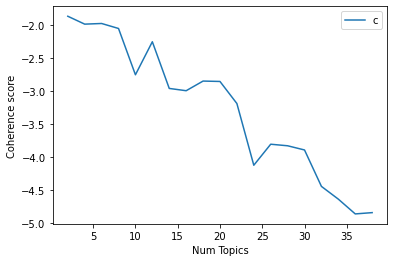

In [90]:


model_list, coherence_values = compute_coherence_values(dictionary=TextCleanWords, corpus=TextCleanWordsCorpus, texts=doc_list, start=2, limit=40, step=2)
# Show graph

limit=40; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [51]:
3

3

### based on the previous figure we select 12 topics (a local minima and not too many topics)

## 1.4. We choose  12 topics

In [91]:
ldamodel12Topics = gensim.models.ldamodel.LdaModel(corpus=TextCleanWordsCorpus, num_topics=17,id2word=TextCleanWords)

In [92]:
# Compute Coherence Score using UMass
ldamodel12TopicsCoherenceModel = CoherenceModel(model=ldamodel12Topics, texts=doc_list, dictionary=TextCleanWords, coherence="u_mass")
coherence_lda = ldamodel12TopicsCoherenceModel.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -3.140306395315722


In [93]:
ldamodel12TopicsCoherenceModel.get_coherence_per_topic()

[-1.892172892113382,
 -1.8724540639300393,
 -3.6666372205471793,
 -3.3430633824030886,
 -7.484768280719067,
 -7.192633122467535,
 -2.2588819008581487,
 -2.7805178587492634,
 -5.124555850118632,
 -3.1558580462188877,
 -2.2995572689451693,
 -1.9365083644332448,
 -2.022358405058961,
 -2.0474085161672204,
 -2.3019092827573453,
 -1.9775861948190794,
 -2.028338070061035]

In [94]:
ldamodel12Topics.print_topics(num_words=10)

[(0,
  '0.011*"challenges" + 0.006*"challenge" + 0.005*"art" + 0.005*"event" + 0.005*"events" + 0.005*"work" + 0.004*"need" + 0.004*"help" + 0.004*"people" + 0.004*"community"'),
 (1,
  '0.007*"time" + 0.006*"support" + 0.006*"able" + 0.005*"working" + 0.005*"help" + 0.005*"funds" + 0.004*"challenge" + 0.004*"work" + 0.004*"happen" + 0.004*"need"'),
 (2,
  '0.007*"new" + 0.006*"help" + 0.005*"time" + 0.004*"going" + 0.004*"market" + 0.004*"production" + 0.004*"materials" + 0.003*"need" + 0.003*"food" + 0.003*"rewards"'),
 (3,
  '0.008*"challenge" + 0.007*"time" + 0.007*"people" + 0.004*"money" + 0.004*"work" + 0.003*"food" + 0.003*"need" + 0.003*"going" + 0.003*"place" + 0.003*"months"'),
 (4,
  '0.007*"new" + 0.007*"funding" + 0.006*"support" + 0.005*"time" + 0.004*"help" + 0.004*"challenges" + 0.004*"event" + 0.003*"need" + 0.003*"money" + 0.003*"create"'),
 (5,
  '0.005*"events" + 0.004*"rewards" + 0.004*"Eric" + 0.004*"time" + 0.004*"local" + 0.004*"challenge" + 0.004*"challenges" 

In [56]:
## we save our 12 topic model

ldamodel12Topics.save('./12TopicsGeneralRisksAndChallenges.lda')

## now that we have our topic modelling engine ready we can compute topics out of any text we need

In [ ]:
KickStarterDataSetSmall['text_risks'].iloc[209]

In [ ]:
ExampleTest=KickStarterDataSetSmall['text_risks'].iloc[209]

In [ ]:
ExampleTest

In [ ]:
ldamodel12Topics.get_document_topics(TextCleanWords.doc2bow(nlp(ExampleTest)),minimum_probability=0.00001)


## The above means that ExampleTest is mosly about topic1  (0.95)

## 2.0 Let's compute the topics for each Risk and Challenge Text

In [ ]:
KickStarterDataSetSmall['text_risks_topics']=KickStarterDataSetSmall['text_risks'].apply(lambda x: ldamodel12Topics.get_document_topics(TextCleanWords.doc2bow(nlp(x)),minimum_probability=0.00001))


In [ ]:
KickStarterDataSetSmall.sample()

In [ ]:
riskTopics=pd.DataFrame(KickStarterDataSetSmall['text_risks_topics'].tolist(), index=KickStarterDataSetSmall.index,columns=['riskstopic0','riskstopic1','riskstopic2','riskstopic3','riskstopic4','risktopic5','risktopic6','risktopic7','risktopic8','risktopic9','risktopic10','risktopic11']) 

In [ ]:
riskTopics=riskTopics.applymap(lambda x: x[1])

In [ ]:
KickStarterDataSetSmallWithRiskTopics=pd.concat([KickStarterDataSetSmall, riskTopics], axis=1)

In [ ]:
KickStarterDataSetSmallWithRiskTopics

In [ ]:
KickStarterDataSetSmallWithRiskTopics[['text_risks','riskstopic0','riskstopic1','riskstopic2','riskstopic3','riskstopic4','risktopic5','risktopic6','risktopic7','risktopic8','risktopic9','risktopic10','risktopic11']]

In [ ]:
KickStarterDataSetSmallWithRiskTopics.to_json('./KickStarterDataSetSmallWithRiskTopics.json')